In [139]:
from category_encoders import TargetEncoder
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [140]:
df = pd.DataFrame({'cat_feat': ['A', 'A', 'C', 'B', 'A', 'C', 'B', 'A', 'C', 'C'],
                   'label': [0, 1, 0, 1, 0, 1, 1, 0, 1, 1]})
df

cat_feat  label
0        A      0
1        A      1
2        C      0
3        B      1
4        A      0
5        C      1
6        B      1
7        A      0
8        C      1
9        C      1

In [141]:
'''
核心计算代码:

prior = self._mean = y.mean()  # 先验概率
stats = y.groupby(X[col]).agg(['count', 'mean'])  # 后验概率

smoove = 1 / (1 + np.exp(-(stats['count'] - self.min_samples_leaf) / self.smoothing))
smoothing = prior * (1 - smoove) + stats['mean'] * smoove
'''
'''
For the case of categorical target: features are replaced with a blend of posterior probability of the target given particular categorical value and the prior probability of the target over all the training data.

For the case of continuous target: features are replaced with a blend of the expected value of the target given particular categorical value and the expected value of the target over all the training data.
'''
enc = TargetEncoder(cols=['cat_feat'],
                    # For regularization the weighted average between category mean and global mean is taken.
                    # The weight is an S-shaped curve between 0 and 1 with the number of samples for a category on the x-axis.
                    # The curve reaches 0.5 at min_samples_leaf.
                    min_samples_leaf=2,
                    # smoothing effect to balance categorical average vs prior.
                    # Higher value means stronger regularization.
                    # The value must be strictly bigger than 0.
                    # Higher values mean a flatter S-curve
                    smoothing=3.0)
enc.fit(X=df, y=df['label'])
enc.transform(df)

cat_feat  label
0  0.368735      0
1  0.368735      1
2  0.699113      0
3  0.800000      1
4  0.368735      0
5  0.699113      1
6  0.800000      1
7  0.368735      0
8  0.699113      1
9  0.699113      1

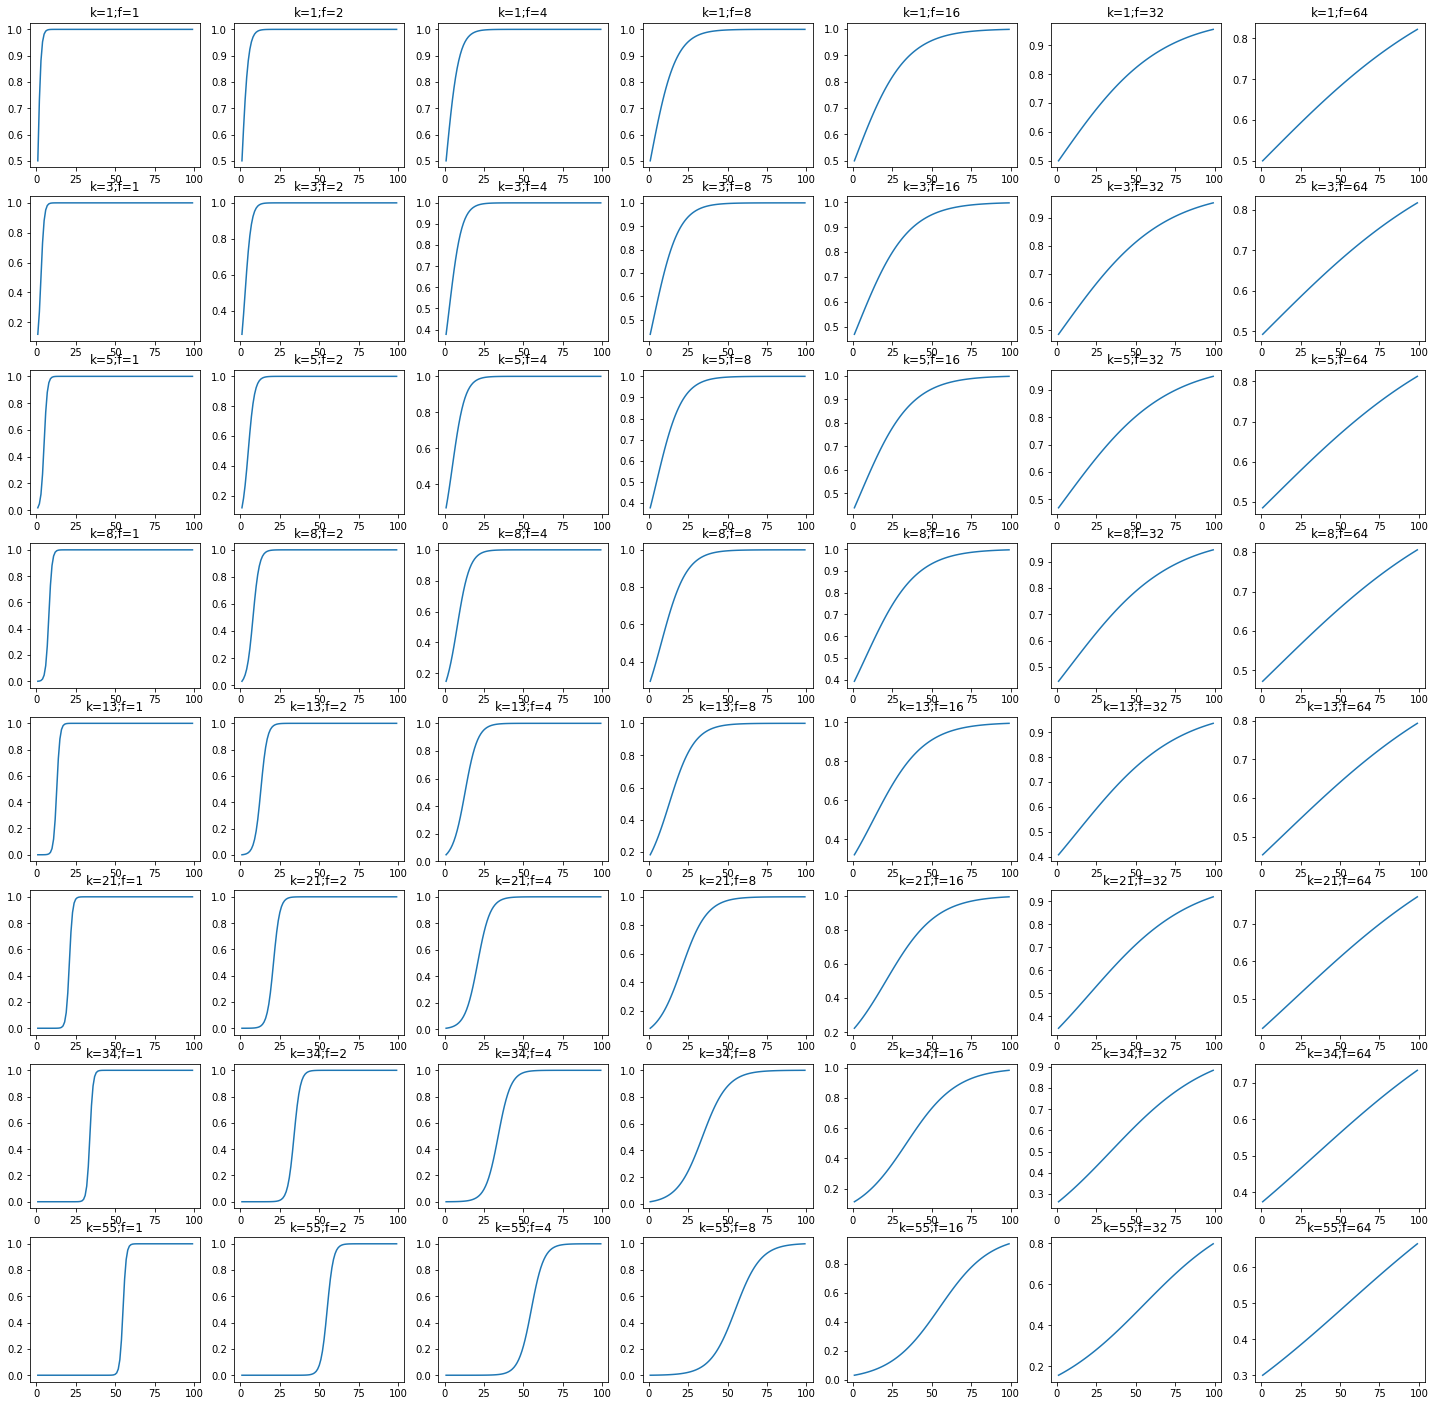

In [142]:
def lambda_coef(n, min_samples_leaf, smoothing):
    return 1 / (1 + np.exp(-(n - min_samples_leaf) / smoothing))


min_samples = [1, 3, 5, 8, 13, 21, 34, 55]
smoothing_params = [2 ** x for x in range(0, 7)]

fig, axes = plt.subplots(len(min_samples), len(smoothing_params), figsize=(25, 25))
x_axis = range(1, 100)  # 分类类别数量
# 不同min_samples_leaf,smoothing的编码情况
for idx1, min_s in enumerate(min_samples):
    for idx2, smoothing in enumerate(smoothing_params):
        y_axis = [lambda_coef(n, min_s, smoothing) for n in x_axis]
        title = f"k={min_s};f={smoothing}"
        axes[idx1, idx2].plot(x_axis, y_axis)
        axes[idx1, idx2].set_title(title)

Text(0, 0.5, 'Category Weight')

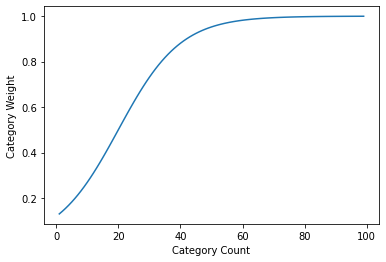

In [143]:
plt.plot(x_axis, [lambda_coef(n, 20, 10) for n in x_axis])
plt.xlabel("Category Count")
plt.ylabel('Category Weight')